In [ ]:
!ls

### Insurance dataset has shape  N,d (1338, 11)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('insurance_data_plevel_54_37_9_new_sensitivity.csv')
# df = pd.read_csv('insurance_data_plevel_54_37_9_sqrtdlambda.csv')
# df = pd.read_csv('insurance_data_plevel344323_affine_lotslambdas_runs500.csv')
df = pd.read_csv('insurance_data_plevel344323_affine_lambdasbig.csv')

In [3]:
df.columns

Index(['frac_train', 'N_train', 'lamb', 'pp_train_mean', 'pp_train_std',
       'pp_test_mean', 'pp_test_std', 'jorg_train_mean', 'jorg_train_std',
       'jorg_test_mean', 'jorg_test_std'],
      dtype='object')

In [4]:
df1 = (df["jorg_train_mean"] <= df["pp_train_mean"])
df2 = (df["jorg_train_std"] <= df["pp_train_std"])
df3 = (df["jorg_test_mean"] <= df["pp_test_mean"])
df4 = (df["jorg_test_std"] <= df["pp_test_std"])

print("df1: ", df1.value_counts())
print("df2 : ", df2.value_counts())
print("df3: ", df3.value_counts())
print("df4: ", df4.value_counts())

df1:  False    87
True     23
dtype: int64
df2 :  False    110
dtype: int64
df3:  False    85
True     25
dtype: int64
df4:  False    110
dtype: int64


In [5]:
df_jorgl_test = df[df["jorg_test_mean"] <= df["pp_test_mean"]]
df_jorgl_test['pp-jorg'] = df_jorgl_test['pp_test_mean']- df_jorgl_test['jorg_test_mean']

/var/folders/t1/gd3l0zxn0hzdg0bsmr1jpsfw0000gn/T/ipykernel_99278/3340721611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jorgl_test['pp-jorg'] = df_jorgl_test['pp_test_mean']- df_jorgl_test['jorg_test_mean']


,frac_train,N_train,lamb,pp_train_mean,pp_train_std,pp_test_mean,pp_test_std,jorg_train_mean,jorg_train_std,jorg_test_mean,jorg_test_std,pp-jorg
8,0.1,120,30.0,0.270416,0.022212,0.271098,0.022950,0.270380,0.026229,0.270964,0.027142,1.337205e-04
9,0.1,120,40.0,0.271995,0.016037,0.272825,0.016596,0.271780,0.018436,0.272528,0.019093,2.967733e-04
20,0.2,240,40.0,0.274199,0.008136,0.272208,0.008341,0.274090,0.009375,0.272090,0.009602,1.181640e-04
30,0.3,361,30.0,0.269110,0.007842,0.269540,0.007995,0.269116,0.009121,0.269524,0.009311,1.675375e-05
32,0.3,361,50.0,0.273330,0.004203,0.273828,0.004267,0.273282,0.004877,0.273766,0.004968,6.248839e-05
40,0.4,481,20.0,0.264483,0.009736,0.264213,0.009995,0.264399,0.011256,0.264098,0.011530,1.147120e-04
42,0.4,481,40.0,0.272106,0.004084,0.271969,0.004189,0.272032,0.004746,0.271892,0.004857,7.675876e-05
43,0.4,481,50.0,0.273824,0.003098,0.273727,0.003168,0.273781,0.003650,0.273684,0.003736,4.221749e-05
51,0.5,602,20.0,0.258812,0.007727,0.264577,0.008005,0.258807,0.009007,0.264564,0.009307,1.367106e-05
53,0.5,602,40.0,0.266223,0.003227,0.272213,0.003318,0.266220,0.003762,0.272210,0.003871,2.249928e-06


In [6]:
df_jorgl_test['pp-jorg'].describe()

count    2.500000e+01
mean     5.738966e-05
std      6.310828e-05
min      4.433304e-07
25%      1.541162e-05
50%      4.221749e-05
75%      7.770092e-05
max      2.967733e-04
Name: pp-jorg, dtype: float64

In [7]:
from collections import Counter

df_poor_generalization = df[df['pp_test_mean'] >= 1][['frac_train', 'N_train','lamb', 'pp_test_mean','jorg_test_mean']]

In [8]:
df_poor_generalization.sort_values(by=['pp_test_mean'], ascending=True)

,frac_train,N_train,lamb,pp_test_mean,jorg_test_mean
24,0.3,361,1.00,1.257163,1.456324
3,0.1,120,2.00,1.451754,1.688887
13,0.2,240,1.00,1.884423,2.183430
2,0.1,120,1.00,3.748573,4.363381
100,1.0,1204,0.05,27.611404,32.333803
89,0.9,1083,0.05,30.968134,35.837453
78,0.8,963,0.05,34.522077,40.370997
67,0.7,842,0.05,39.375172,46.433153
56,0.6,722,0.05,46.387242,53.344923
45,0.5,602,0.05,54.990961,64.424988


In [ ]:
df[df['pp_test_mean'] >= 1]['lamb']

In [ ]:
Counter(df_poor_generalization['frac_train']), Counter(df_poor_generalization['lamb'])

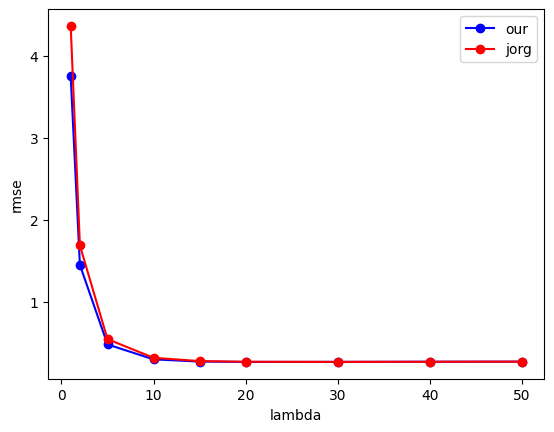

lambdas [ 1.  2.  5. 10. 15. 20. 30. 40. 50.]
jorgensen test rmse [4.36338137 1.688887   0.5479287  0.32073617 0.28069486 0.27254849
 0.27096396 0.27252829 0.27397881]
our test rmse [3.74857331 1.45175406 0.48372905 0.30180832 0.27489698 0.27052782
 0.27109768 0.27282506 0.27393697]
percent drop from jorgensen [ 1.64011215e+01  1.63342369e+01  1.32718220e+01  6.27148006e+00
  2.10911041e+00  7.46934728e-01 -4.93255607e-02 -1.08777887e-01
  1.52739841e-02]


In [47]:
si = 2
f = 0.1
lambs = df[df['frac_train'] == f]['lamb'][si:]
pp_test = (df[df['frac_train'] == f]['pp_test_mean'][si:]).to_numpy()
jorg_test = (df[df['frac_train'] == f]['jorg_test_mean'][si:]).to_numpy()

plt.plot(lambs, pp_test, 'bo-', label = 'our')
plt.plot(lambs, jorg_test, 'ro-', label = 'jorg')
# plt.plot(lambs, jorg_test - pp_test, 'ro-', label = 'jorg')
plt.xlabel('lambda')
plt.ylabel('rmse')
plt.legend(loc="upper right")
plt.show()
print('lambdas', lambs.to_numpy())
print('jorgensen test rmse', jorg_test)
print('our test rmse', pp_test)
print('percent drop from jorgensen', 100*(jorg_test-pp_test) / pp_test)

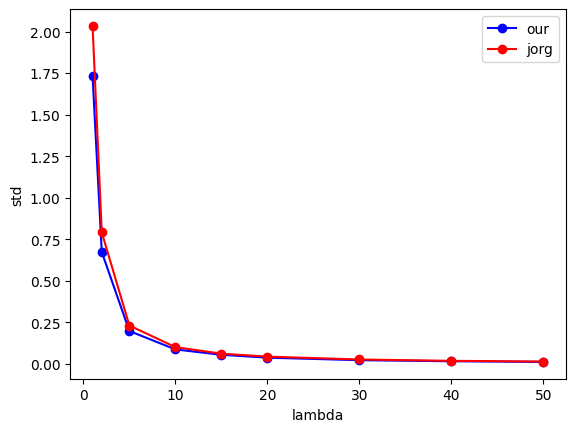

lambdas [ 1.  2.  5. 10. 15. 20. 30. 40. 50.]
jorgensen test rmse std [2.03373545 0.79153383 0.23137332 0.10157648 0.06228904 0.04438923
 0.02714226 0.01909297 0.01493975]
our test rmse std [1.73148063 0.67342954 0.19828418 0.08780773 0.05543608 0.03817595
 0.02295007 0.01659594 0.01255599]
percent drop in standard deviation compared to jorgensen [17.45643649 17.53773572 16.68773796 15.6805699  12.36190201 16.27537144
 18.2665534  15.04602874 18.98498314]


In [48]:
si = 2
f = 0.1
lambs = df[df['frac_train'] == f]['lamb'][si:]
pp_test = (df[df['frac_train'] == f]['pp_test_std'][si:]).to_numpy()
jorg_test = (df[df['frac_train'] == f]['jorg_test_std'][si:]).to_numpy()

plt.plot(lambs, pp_test, 'bo-', label = 'our')
plt.plot(lambs, jorg_test, 'ro-', label = 'jorg')
# plt.plot(lambs, jorg_test - pp_test, 'ro-', label = 'jorg')
plt.xlabel('lambda')
plt.ylabel('std')
plt.legend(loc="upper right")
plt.show()
print('lambdas', lambs.to_numpy())
print('jorgensen test rmse std', jorg_test)
print('our test rmse std', pp_test)
print('percent drop in standard deviation compared to jorgensen', 100*(jorg_test-pp_test) / pp_test)

In [ ]:
for frac in fracs:
  df_frac = df[df['frac_train'] == frac]
  res_frac = []
  for lamb in lambs:
    print(len(df_frac[df_frac['lamb'] == lamb]))

In [ ]:
df[df["jorg_train_mean"] <= df["pp_train_mean"]]

In [ ]:
df[df["jorg_test_mean"] <= df["pp_test_mean"]]

In [ ]:
(df["pp_test_mean"]>=1.0).value_counts() # wherever mean error > 1 

In [ ]:
df[df["pp_test_mean"]>=1.0]['lamb'].value_counts()

In [ ]:
df['jorg_minus_pp_test'] = df["jorg_test_mean"] - df["pp_test_mean"]# difference between jorgensen and ours on test

In [ ]:
df['jorg_minus_pp_test'].describe()

In [ ]:
df['%_from_jorg_test'] = 100 * df['jorg_minus_pp_test'] / df["jorg_test_mean"]

In [ ]:
df['%_from_jorg_test'].describe() # with 54

In [ ]:
df['%_from_jorg_test'].describe() # with 34

In [ ]:
from src.utils import generate_linear_data

In [ ]:
X,y = generate_linear_data(100, 100, 0)

In [ ]:
np.linalg.norm(X, axis=1)

In [ ]:
max(np.linalg.norm(X, axis=1))

In [ ]:
3**0.5

In [ ]:
1/4*100